In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt

In [2]:
(xtrain, ytrain),(xtest, ytest) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
xtrain, xtest = xtrain / 255.0, xtest / 255.0

In [4]:
model = Sequential([Flatten(input_shape=(28,28)),
                    Dense(512, activation = 'relu'),
                    Dense(256, activation = 'relu'),
                    Dense(10, activation = 'softmax')])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model.compile(optimizer = SGD(learning_rate = 0.01), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
history = model.fit(xtrain, ytrain, epochs = 15, batch_size = 128, validation_data = (xtest, ytest))

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.5971 - loss: 1.5965 - val_accuracy: 0.8752 - val_loss: 0.5127
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8760 - loss: 0.4836 - val_accuracy: 0.8993 - val_loss: 0.3658
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.8986 - loss: 0.3707 - val_accuracy: 0.9113 - val_loss: 0.3153
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9107 - loss: 0.3182 - val_accuracy: 0.9189 - val_loss: 0.2876
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9156 - loss: 0.2999 - val_accuracy: 0.9242 - val_loss: 0.2678
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9204 - loss: 0.2797 - val_accuracy: 0.9284 - val_loss: 0.2521
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9260 - loss: 0.2568 - val_accuracy: 0.9313 - val_loss: 0.2398
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9283 - loss: 0.2467 - val_acc

In [8]:
test_loss, test_accuracy = model.evaluate(xtest, ytest)
print(f"test loss: {test_loss:.2f}, test accuracy: {test_accuracy:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9409 - loss: 0.2024
test loss: 0.17, test accuracy: 0.95


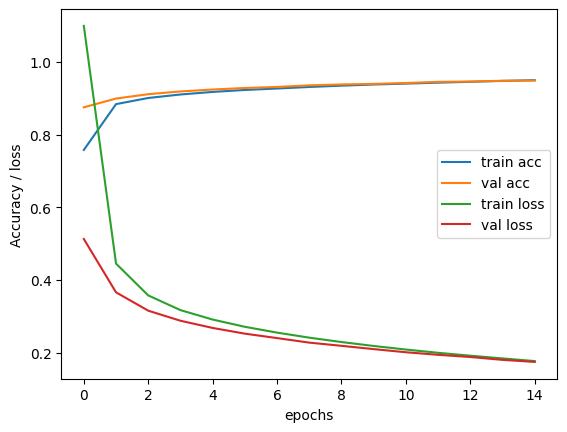

In [9]:
plt.plot(history.history['accuracy'], label = 'train acc')
plt.plot(history.history['val_accuracy'], label = 'val acc')
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.xlabel('epochs')
plt.ylabel('Accuracy / loss')
plt.legend()
plt.show()

3


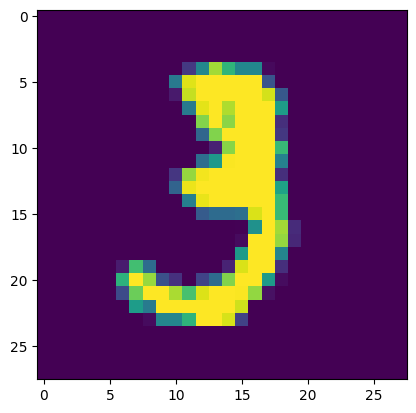

In [17]:
plt.imshow(xtrain[10])
plt.show(
print(ytrain[10]))